# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **None, North Rhine-Westphalia, Germany**, or **Germany** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **None, North Rhine-Westphalia, Germany** to Ann Arbor, USA. In that case at least one source file must be about **None, North Rhine-Westphalia, Germany**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **None, North Rhine-Westphalia, Germany** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

#### Region
Düsseldorf, North Rhine-Westphalia, Germany
#### Domain
economic activity or measures


#### Question
How has the percentage share of female part-time workers in Berlin changed during the period 2008 to 2018 in comparison to that of whole Germany within the same time period?

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

rows_to_discard=list(range(11))
rows_to_discard.append(494)

berlin = pd.read_csv('Assignment4_Data_Berlin.csv', header=0, parse_dates=['Date'], na_values='.')
berlin.set_index('Date', inplace=True)
berlin_total_employment = berlin[berlin.EmploymentType=='Total'].Total
berlin_female_part_time = berlin[berlin.EmploymentType=='Part-time'].Total_female.\
    interpolate(method ='linear', limit_direction ='forward')

berlin_percentage = 100*berlin_female_part_time/berlin_total_employment

berlin_percentage

Date
2018-06-30    21.942519
2017-06-30    21.777236
2016-06-30    21.634520
2015-06-30    21.383271
2014-06-30    20.833744
2013-06-30    20.425896
2012-06-30    19.295982
2011-06-30    18.304543
2010-06-30    17.045904
2009-06-30    16.689319
2008-06-30    16.452740
dtype: float64

In [10]:
germany = pd.read_csv('Assignment4_Data_Germany.csv', header=0, parse_dates=['Date'], na_values='.')
germany.set_index('Date', inplace=True)

germany_total_employment = germany[germany.EmploymentType=='Total'].Total
germany_female_part_time = germany[germany.EmploymentType=='Part-time'].Total_female.\
    interpolate(method ='linear', limit_direction ='forward')

germany_percentage = 100*germany_female_part_time/germany_total_employment

germany_percentage

Date
2018-06-30    22.128846
2017-06-30    21.963457
2016-06-30    21.690033
2015-06-30    21.340602
2014-06-30    20.750110
2013-06-30    20.391799
2012-06-30    19.167105
2011-06-30    18.102135
2010-06-30    17.013383
2009-06-30    16.490420
2008-06-30    15.853453
dtype: float64

In [11]:
# one dataframe
plot_df = pd.concat([berlin_percentage, germany_percentage], axis=1)
plot_df.columns = ["Berlin", "Germany"]

plot_df

,Berlin,Germany
Date,,
2018-06-30,21.942519,22.128846
2017-06-30,21.777236,21.963457
2016-06-30,21.634520,21.690033
2015-06-30,21.383271,21.340602
2014-06-30,20.833744,20.750110
2013-06-30,20.425896,20.391799
2012-06-30,19.295982,19.167105
2011-06-30,18.304543,18.102135
2010-06-30,17.045904,17.013383


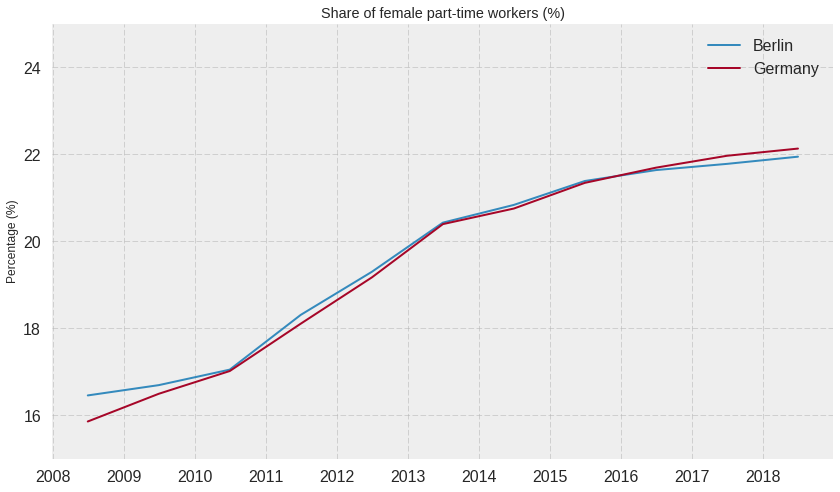

In [17]:
plt.figure(figsize=(14,8))
plt.style.use('bmh')

plt.plot(plot_df.Berlin)
plt.plot(plot_df.Germany)
plt.title('Share of female part-time workers (%)')
plt.ylabel('Percentage (%)')

axes = plt.gca()
axes.set_ylim([15, 25])

plt.legend()
plt.show()

A part-time worker is defined in § 2 of "Gesetz über Teilzeitarbeit und befristete Arbeitsverträgeas" as a worker whose regular weekly working time is shorter than that of a comparable full-time worker. In the diagram, we look at the change specifically in share of female part-time workers as percentage of total number of workers during the period 2008 to 2018 in Berlin and whole of Germany. Both of the data was collected from the website of Federal Statistical Office of Germany and then translated. Note the data include only workers who must contribute to social securities and also the data for year 2011 and 2012 have been interploted due to missing values. In the diagram, we see that the percentage share of part-time female employees shows similar trend in both Berlin and the whole of Germany. The diagram above does not provide any information to make any causal interpretations. Thus as a next step, it would be also interesting to create some hypothesis and explore them.